In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import datetime as dt



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [ ]:
!pip install xlrd

In [ ]:
! pip install openpyxl


In [ ]:

commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [ ]:
df_study_domain = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_study_domain.head()

,key,quest_id,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,other,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
1,item1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,0,0,0,0
2,item6,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,0,0,0,0,1,0,0,0
3,other,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
4,other,905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1


In [ ]:
df_study_domain1 = df_study_domain.groupby("quest_id").sum()
df_study_domain1.head(2)
print(df_study_domain1.shape)

(244, 9)


In [ ]:
df_technology = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_technology1 = df_technology.groupby("quest_id").sum()
df_technology1.head(2)

,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
quest_id,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,1,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,1,1,1,1,1,0,0,1,0,1,0,0


In [ ]:
df_industry = pd.get_dummies(data=industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_industry1 = df_industry.groupby("quest_id").sum()
df_industry1.head()
print(df_industry1.shape)

(246, 14)


In [ ]:
quest.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
df_result=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
df_result.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df_result1=pd.merge(left=df_result, right=df_study_domain1, how = 'left',on='quest_id')
df_result2=pd.merge(left=df_result1, right=df_technology1, how = 'left',on='quest_id')
df_result3=pd.merge(left=df_result2, right=df_industry1, how = 'left',on='quest_id')
df_result3.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


commune["Commune_Id"] = commune["Commune_Id"].str.lower()
commune["ADM1_PCODE"] = commune["ADM1_PCODE"].str.lower()
commune.head(2)

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,ht0812,Grande'Anse,ht08
1,Acul du Nord,Acul du Nord,ht0321,North,ht03


In [ ]:
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)
commune.head(2)

,Commune_en,Commune_FR,commune,Departement,ADM1_PCODE
0,Abricots,Abricots,ht0812,Grande'Anse,ht08
1,Acul du Nord,Acul du Nord,ht0321,North,ht03


In [ ]:
df_result4=pd.merge(left=df_result3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
df_result4.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West


In [ ]:
df_result4["created_at_x"] = df_result4["created_at_x"].str[:10]


In [ ]:
ord.head(2)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601


In [ ]:
transaction.head(2)

,Column1,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160


In [ ]:
df_result5=pd.concat([transaction,ord],axis=0)
df_result5


,Column1,created_at,modified_at,user_id,course_id,transaction_id,Unnamed: 0,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0.0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613.0,4.641282e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613.0,4.644270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613.0,4.645071e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,1047613.0,4.645209e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,1047613.0,4.646815e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,NaN,2021-02-18T14:45:02.292Z,NaN,39908510,NaN,NaN,13.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,905f5dc1-ce95-11eb-bfa7-7c67a234f601
14,NaN,2021-02-17T13:48:38.371Z,NaN,39903501,NaN,NaN,14.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,NaN
15,NaN,2021-02-17T11:08:54.385Z,NaN,39896120,NaN,NaN,15.0,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,bootcamp_enroll,6452874.0,NaN,Complete,9062b754-ce95-11eb-b31e-7c67a234f601
16,NaN,2021-02-16T20:09:31.627Z,NaN,39856539,NaN,NaN,16.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9069789f-ce95-11eb-9788-7c67a234f601


In [ ]:
df_result5.drop(["Column1","Unnamed: 0","course_id","status","product_name","product_id",	"amount_cents",	"subscription",	"coupon_code",	"coupon_id",	"affiliate_referral_code"], axis="columns",inplace=True)


In [ ]:
df_result5

,created_at,modified_at,user_id,transaction_id,amount_dollars,quest_id
0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,4.641282e+09,NaN,NaN
1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,4.644270e+09,NaN,NaN
2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,4.645071e+09,NaN,NaN
3,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,4.645209e+09,NaN,NaN
4,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,4.646815e+09,NaN,NaN
...,...,...,...,...,...,...
13,2021-02-18T14:45:02.292Z,NaN,39908510,NaN,20.0,905f5dc1-ce95-11eb-bfa7-7c67a234f601
14,2021-02-17T13:48:38.371Z,NaN,39903501,NaN,20.0,NaN
15,2021-02-17T11:08:54.385Z,NaN,39896120,NaN,0.0,9062b754-ce95-11eb-b31e-7c67a234f601
16,2021-02-16T20:09:31.627Z,NaN,39856539,NaN,20.0,9069789f-ce95-11eb-9788-7c67a234f601


In [ ]:

df_result4=df_result4.loc[:,["gender","dob","created_at_x","education_level","have_computer_home",
                 "internet_at_home","hear_AA_1","quest_id","course_name","Commune_FR","Departement"]]



In [ ]:
df_result6=pd.merge(left=df_result4, right=df_result5 , how="left", on= "quest_id")

In [ ]:
df_result6

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars
0,male,25/08/1998,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
1,female,29/09/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
2,male,17/05/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
3,male,24/11/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
4,male,20/07/1997,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,15/02/1994,2021-03-02,Bachelors (bacc +4),Yes,Yes,Facebook,906b3c84-ce95-11eb-8c2a-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
246,male,08/10/1990,2021-03-10,Bachelors (bacc +4),Yes,Yes,Friend,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
247,male,28/12/1993,2021-03-14,Bachelors (bacc +4),Yes,Yes,Friend,906b3c86-ce95-11eb-b6a7-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,2021-03-14T15:34:35.014Z,NaN,41587952.0,NaN,20.0
248,male,17/04/1992,2021-03-08,Bachelors (bacc +4),Yes,Yes,Facebook,906b65e2-ce95-11eb-8b5c-7c67a234f601,Entwodiksyon Nan Syans Done,Ferrier,North-East,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_result6["dob"].replace({'3 aout 1977': '03/08/1977'}, inplace=True)
#df_result6[df_result6["dob"]== '3 aout 1977']
#print(df_result6.iloc[10:20])

In [ ]:
df_result6["dob"] = pd.to_datetime(df_result6["dob"])

In [ ]:
df_result6["created_at_x"] = pd.to_datetime(df_result6["created_at_x"])
df_result6

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
4,male,1997-07-20,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,2021-03-02,Bachelors (bacc +4),Yes,Yes,Facebook,906b3c84-ce95-11eb-8c2a-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
246,male,1990-08-10,2021-03-10,Bachelors (bacc +4),Yes,Yes,Friend,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
247,male,1993-12-28,2021-03-14,Bachelors (bacc +4),Yes,Yes,Friend,906b3c86-ce95-11eb-b6a7-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,2021-03-14T15:34:35.014Z,NaN,41587952.0,NaN,20.0
248,male,1992-04-17,2021-03-08,Bachelors (bacc +4),Yes,Yes,Facebook,906b65e2-ce95-11eb-8b5c-7c67a234f601,Entwodiksyon Nan Syans Done,Ferrier,North-East,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_result6["age"]=df_result6["created_at_x"]-df_result6["dob"]
df_result6["age"]=df_result6["age"]//365
df_result6["age"] = df_result6["age"].apply(lambda x: str(x)[:2])
df_result6.head()

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
4,male,1997-07-20,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,23


In [ ]:
df_result6 = df_result6.rename(columns={"created_at_x":"Registration_date","amount_dollars":"Payed_by_card","transaction_id":"payed_by_moncash"})

In [ ]:
df_result6.head(2)

,gender,dob,Registration_date,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,payed_by_moncash,Payed_by_card,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24


In [ ]:
df_result6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gender              250 non-null    object        
 1   dob                 244 non-null    datetime64[ns]
 2   Registration_date   250 non-null    datetime64[ns]
 3   education_level     250 non-null    object        
 4   have_computer_home  250 non-null    object        
 5   internet_at_home    250 non-null    object        
 6   hear_AA_1           250 non-null    object        
 7   quest_id            250 non-null    object        
 8   course_name         102 non-null    object        
 9   Commune_FR          250 non-null    object        
 10  Departement         250 non-null    object        
 11  created_at          14 non-null     object        
 12  modified_at         0 non-null      object        
 13  user_id             14 non-null     float64       

In [ ]:
values = df_result6.isna().sum()
values

gender                  0
dob                     6
Registration_date       0
education_level         0
have_computer_home      0
internet_at_home        0
hear_AA_1               0
quest_id                0
course_name           148
Commune_FR              0
Departement             0
created_at            236
modified_at           250
user_id               236
payed_by_moncash      250
Payed_by_card         236
age                     0
dtype: int64

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students


In [ ]:
def generate_barchart(data="", title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=""):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


In [ ]:
# kakile frekans absoli ak frekans relativ yon varyab kategorik
def graf(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result







In [ ]:
#commune_data=commune_data.fillna(0)
#commune_data
commune_total = df_result6.Commune_FR.value_counts(normalize=False).to_frame()
commune_total1= commune_total.sort_values(by="Commune_FR",ascending=False)
commune_total2= commune_total1.head(3)
commune_total2["frequence"]=  commune_total2/df_result6.shape[0]  
commune_total2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Commune_FR,frequence
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116


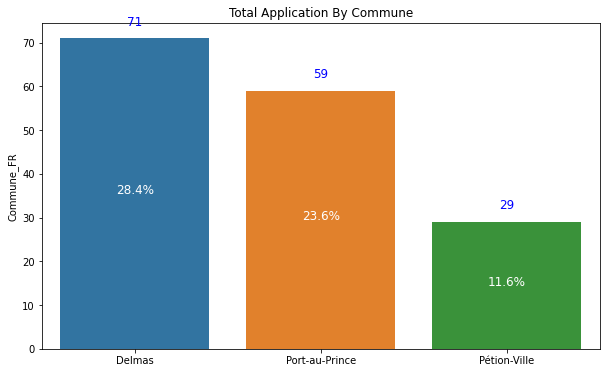

In [ ]:
generate_barchart(data=commune_total2,title="Total Application By Commune",abs_value="Commune_FR",rel_value="frequence")


In [ ]:
commune_data= pd.pivot_table(df_result6, values="quest_id", index=["Commune_FR"],columns ="gender", aggfunc="count")
commune_data["frequence"]=commune_data["female"]/(commune_data["female"]+commune_data["male"])                                            

In [ ]:
commune_data.shape

(35, 3)

In [ ]:
prob_gender = df_result6.gender.value_counts(normalize=True).to_frame()
prob_gender.rename(columns={"gender":"Percent"},inplace=True)
prob_gender

,Percent
male,0.812
female,0.188


In [ ]:
gender_total = df_result6.gender.value_counts(normalize=False).to_frame()
gender_total.rename(columns={"gender": "Total"},inplace=True)
gender_total

,Total
male,203
female,47


In [ ]:
gender_result = pd.concat([prob_gender,gender_total],axis =1)
gender_result#.reset_index()

,Percent,Total
male,0.812,203
female,0.188,47


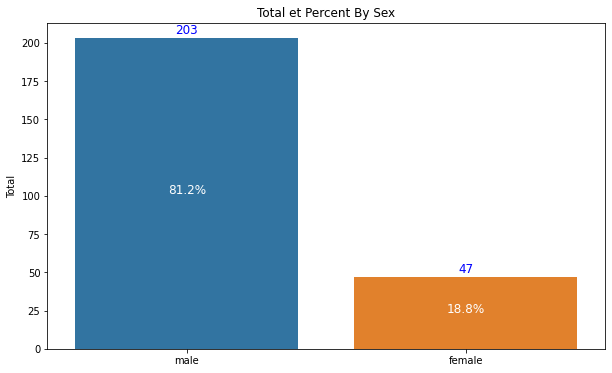

In [ ]:
generate_barchart(data=gender_result,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")


In [ ]:
# Kakile pwobabilite  yon fi ki nan klas 1
# prob_1_woman= df_result6[(df_result6.gender =="female") & (df_result6.gender)].shape[0] / titanic.shape[0]
# prob_1_woman


### mwen la m vle calculer pwob pou jwenn yon fi sou kantite moun ki incrit yo


In [ ]:
def pivot(y):
  pivo=pd.pivot_table(df_result6, values='quest_id', index=['Commune_FR'], columns=y,aggfunc='count')
  pivo=pivo.fillna(0)
    #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return pivo

In [ ]:
pv_gender=pivot("gender")
pv_gender.head()
pv_internet =pivot("internet_at_home")
pv_internet.head()
pv_computer=pivot("have_computer_home")
pv_computer.head()
pv_education=pivot("education_level")
pv_education.head()

education_level,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown
Commune_FR,,,,,,
Aquin,1.0,0.0,0.0,0.0,0.0,0.0
Cap-Haïtien,4.0,0.0,0.0,0.0,1.0,0.0
Caracol,1.0,0.0,0.0,0.0,0.0,0.0
Carrefour,17.0,0.0,3.0,1.0,2.0,0.0
Cité Soleil,1.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
pv_computer= pv_computer.rename(columns={"Yes":"have_computer","No":"dont_have_computer"})
pv_internet=pv_internet.rename(columns={"Yes":"have_internet","No":"dont_have_internet"})
df_concat= pd.concat([pv_gender, pv_education, pv_internet, pv_computer], axis=1)
df_concat.head()


,female,male,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown,dont_have_internet,have_internet,unknown,dont_have_computer,have_computer,unknown
Commune_FR,,,,,,,,,,,,,,
Aquin,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Cap-Haïtien,0.0,5.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,5.0,0.0
Caracol,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Carrefour,6.0,17.0,17.0,0.0,3.0,1.0,2.0,0.0,5.0,18.0,0.0,2.0,21.0,0.0
Cité Soleil,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0


What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection


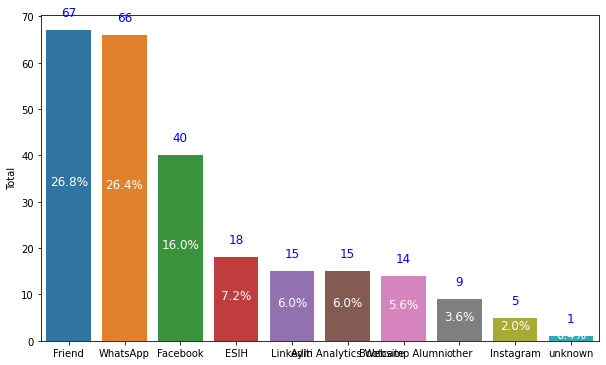

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
LinkedIn,15,0.060
Ayiti Analytics Website,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [ ]:
graf(data=df_result6,col="hear_AA_1",show_plot=True,figsize=(4,4))

What is the average number of university students who should participate in this program

In [ ]:
education_percent = df_result6.education_level.value_counts(normalize=True).to_frame()
education_percent
education_total = df_result6.education_level.value_counts(normalize=False).to_frame()
education_total
education_total.rename(columns={"education_level": "Total"},inplace=True)
education_percent.rename(columns={"education_level": "percent"},inplace=True)
education_result = pd.concat ([education_total,education_percent],axis =1)
education_result


,Total,percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [ ]:
fekans=((df_result6[['education_level']]=="Bachelors (bacc +4)").sum() + (df_result6[['education_level']]=="Masters").sum() + (df_result6[['education_level']]=="Doctorate (PhD, MD, JD)").sum())/df_result6.shape[0]
np.round(fekans*df_result6.shape[0]*4.5,0)

education_level    734.0
dtype: float64

In [ ]:
pv_education=pivot("education_level")
pv_education.head(2)
pv_education.sum().to_frame()


,0
education_level,
Bachelors (bacc +4),148.0
"Doctorate (PhD, MD, JD)",1.0
High School (16 years),33.0
Masters,14.0
Other,51.0
unknown,3.0


In [ ]:
((df_result6[['education_level']]=="Bachelors (bacc +4)").sum() + (df_result6[['education_level']]=="Masters").sum() + (df_result6[['education_level']]=="Doctorate (PhD, MD, JD)	").sum())/df_result6.shape[0]


education_level    0.648
dtype: float64

In [ ]:
df_result6["male"] = df_result6["gender"].apply(lambda x: 1 if x == "male" else 0)


In [ ]:
df_result6["female"] =df_result6["gender"].apply(lambda x: 1 if x=="female" else 0)

In [ ]:
registration_data =df_result6[["Registration_date","quest_id", "female","male"]].groupby(pd.Grouper(key="Registration_date",freq='7D')).sum()
registration_data



,female,male
Registration_date,,
2021-02-14,28,108
2021-02-21,13,41
2021-02-28,3,26
2021-03-07,3,26
2021-03-14,0,2


In [ ]:
registration_data['sum']=registration_data['male']+registration_data['female']
registration_data.head()
registration_data['frequencies']=registration_data['sum']/df_result6.shape[0]
registration_data.head()
registration_data_mean=(registration_data['sum'].sum())/registration_data.shape[0]
registration_data_mean
#prob_category(data=registration,col="frequencies",show_plot=True,figsize= (3,2), title="Repartition des...")


50.0

In [ ]:
from matplotlib.colors import ListedColormap
#we are doing a pivot table with Internet at home and Commune
rez = pd.pivot_table(data=df_result6,values="quest_id",columns="internet_at_home",index="Commune_FR",aggfunc="count")
# #We define the first axe
# axe1 =rez.plot(kind='bar', stacked=True,
#           colormap=ListedColormap(sns.color_palette("pastel", 10)), 
#           figsize=(12,6))
# #We show the plot
# plt.figure(figsize=(10,6))

In [ ]:
rez

internet_at_home,No,Yes,unknown
Commune_FR,,,
Aquin,NaN,1.0,NaN
Cap-Haïtien,2.0,3.0,NaN
Caracol,NaN,1.0,NaN
Carrefour,5.0,18.0,NaN
Cité Soleil,NaN,3.0,NaN
Cornillon / Grand Bois,NaN,1.0,NaN
Croix-Des-Bouquets,2.0,8.0,NaN
Delmas,10.0,61.0,NaN
Dondon,1.0,NaN,NaN


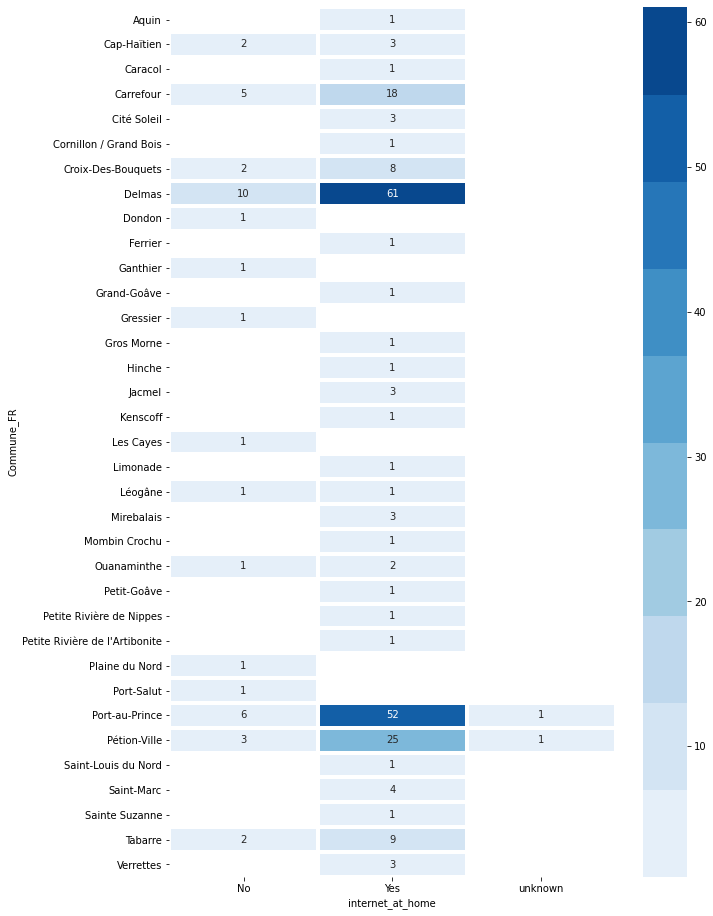

In [ ]:
plt.figure(figsize=(10,16))
#We have done a heat map so that we could see the commune in which the number of applicants who have internet at home is high
sns.heatmap(data=rez,cmap =ListedColormap(sns.color_palette("Blues", 10)),vmin =rez.min().min(),vmax =rez.max().max(),annot=True,linecolor="white",linewidths=3,)

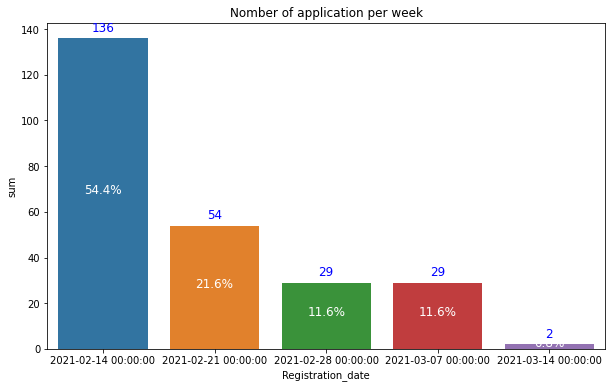

In [ ]:
generate_barchart(data=registration_data,title="Nomber of application per week",abs_value="sum",rel_value="frequencies", horizontal=False)


If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

In [ ]:
int_home=pv_internet["have_internet"].to_frame()
int_home_percent = int_home/df_result6.shape[0]
int_home1=int_home.sort_values(by="have_internet", ascending=False)
int_home_percent1=int_home_percent.sort_values(by="have_internet", ascending=False)
int_home1.rename(columns={"have_internet": "internet_total"},inplace=True)
int_home_percent1.rename(columns={"have_internet": "internet_percent"},inplace=True)
int_result= pd.concat([int_home1,int_home_percent1], axis=1)
int_result.head(3)


,internet_total,internet_percent
Commune_FR,,
Delmas,61.0,0.244
Port-au-Prince,52.0,0.208
Pétion-Ville,25.0,0.100


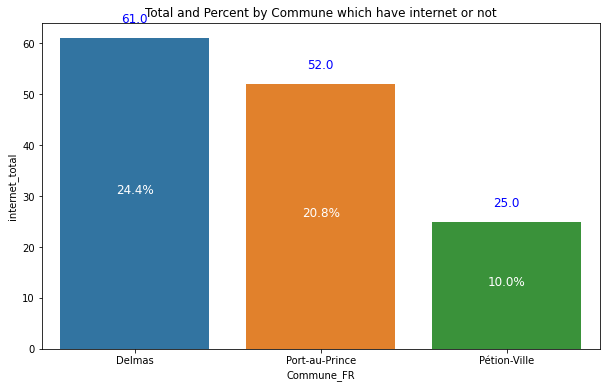

In [ ]:
generate_barchart(data=int_result.iloc[:3,:],title="Total and Percent by Commune which have internet or not",abs_value="internet_total",rel_value="internet_percent")


In [ ]:
computer=pv_computer["have_computer"].to_frame()
computer_percent = computer/df_result6.shape[0]
computer1=computer.sort_values(by="have_computer", ascending=False)
computer_percent1=computer_percent.sort_values(by="have_computer", ascending=False)
computer1.rename(columns={"have_computer": "computer_total"},inplace=True)
computer_percent1.rename(columns={"have_computer": "computer_percent"},inplace=True)
computer_result= pd.concat([computer1,computer_percent1], axis=1)
computer_result.head(3)

,computer_total,computer_percent
Commune_FR,,
Delmas,66.0,0.264
Port-au-Prince,57.0,0.228
Pétion-Ville,25.0,0.100


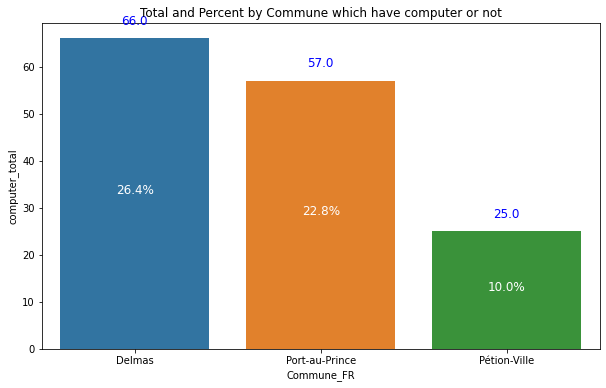

In [ ]:
generate_barchart(data=computer_result.iloc[:3,:],title="Total and Percent by Commune which have computer or not",abs_value="computer_total",rel_value="computer_percent")


In [ ]:
comp_int= pd.merge(left=int_result,right=computer_result, how="left", on="Commune_FR")
compte_final=comp_int.head(3)
compte_final

,internet_total,internet_percent,computer total,computer_percent
Commune_FR,,,,
Delmas,61.0,0.244,66.0,0.264
Port-au-Prince,52.0,0.208,57.0,0.228
Pétion-Ville,25.0,0.100,25.0,0.100


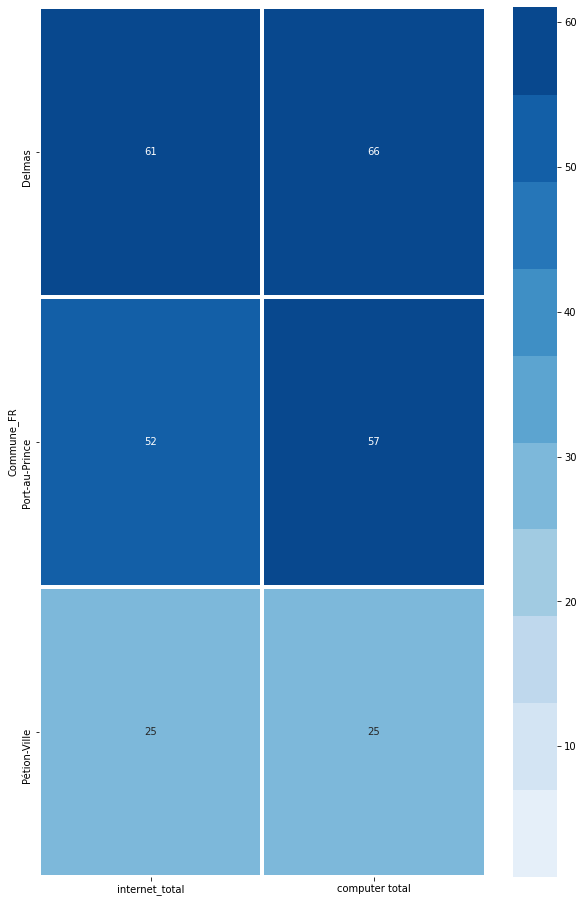

In [ ]:
plt.figure(figsize=(10,16))
#We have done a heat map so that we could see the commune in which the number of applicants who have internet at home is high
sns.heatmap(data=compte_final[["internet_total", "computer total"]],cmap =ListedColormap(sns.color_palette("Blues", 10)),vmin =rez.min().min(),vmax =rez.max().max(),annot=True,linecolor="white",linewidths=3)

In [ ]:
canal_data_1= pd.pivot_table(df_result6, values="quest_id",index="gender",columns="hear_AA_1",aggfunc="count")
canal_data_1

hear_AA_1,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4.0,8.0,5.0,6.0,11.0,1.0,1.0,9.0,2.0,NaN
male,11.0,6.0,13.0,34.0,56.0,4.0,14.0,57.0,7.0,1.0


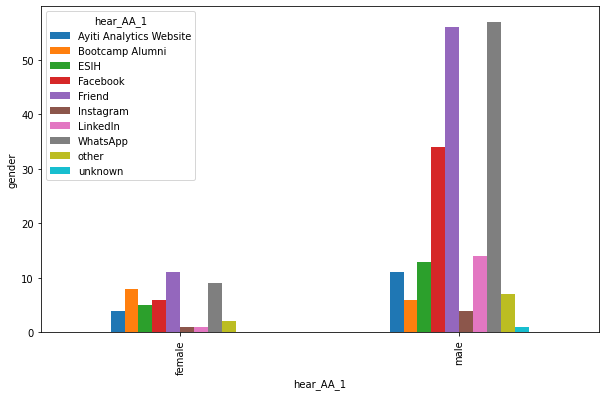

In [ ]:
#generate_barchart(data=gender_result,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")
figure_1= canal_data_1.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig =figure_1.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10,6)
# Change the axes labels
figure_1.set_xlabel("hear_AA_1")
figure_1.set_ylabel("gender")
figure_1

In [ ]:
canal_data_2 = pd.pivot_table(df_result6, values="gender",index="quest_id",columns="hear_AA_1",aggfunc="sum")
canal_data_2

hear_AA_1,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
quest_id,,,,,,,,,,
905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN
905e2608-ce95-11eb-809f-7c67a234f601,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN
905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
906b3c84-ce95-11eb-8c2a-7c67a234f601,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN
906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN
906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN
